In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("wines_SPA.csv")

In [3]:
df.head()

,winery,wine,year,rating,num_reviews,country,region,price,type,body,acidity
0,Teso La Monja,Tinto,2013,4.9,58,Espana,Toro,995.00,Toro Red,5.0,3.0
1,Artadi,Vina El Pison,2018,4.9,31,Espana,Vino de Espana,313.50,Tempranillo,4.0,2.0
2,Vega Sicilia,Unico,2009,4.8,1793,Espana,Ribera del Duero,324.95,Ribera Del Duero Red,5.0,3.0
3,Vega Sicilia,Unico,1999,4.8,1705,Espana,Ribera del Duero,692.96,Ribera Del Duero Red,5.0,3.0
4,Vega Sicilia,Unico,1996,4.8,1309,Espana,Ribera del Duero,778.06,Ribera Del Duero Red,5.0,3.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7500 entries, 0 to 7499
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   winery       7500 non-null   object 
 1   wine         7500 non-null   object 
 2   year         7498 non-null   object 
 3   rating       7500 non-null   float64
 4   num_reviews  7500 non-null   int64  
 5   country      7500 non-null   object 
 6   region       7500 non-null   object 
 7   price        7500 non-null   float64
 8   type         6955 non-null   object 
 9   body         6331 non-null   float64
 10  acidity      6331 non-null   float64
dtypes: float64(4), int64(1), object(6)
memory usage: 644.7+ KB


In [5]:
df.describe()

,rating,num_reviews,price,body,acidity
count,7500.000000,7500.000000,7500.000000,6331.000000,6331.000000
mean,4.254933,451.109067,60.095822,4.158427,2.946612
std,0.118029,723.001856,150.356676,0.583352,0.248202
min,4.200000,25.000000,4.990000,2.000000,1.000000
25%,4.200000,389.000000,18.900000,4.000000,3.000000
50%,4.200000,404.000000,28.530000,4.000000,3.000000
75%,4.200000,415.000000,51.350000,5.000000,3.000000
max,4.900000,32624.000000,3119.080000,5.000000,3.000000


In [6]:
df.isnull().sum()

,0
winery,0
wine,0
year,2
rating,0
num_reviews,0
country,0
region,0
price,0
type,545
body,1169


In [7]:
missing_rows = df[df['year'].isnull()]
missing_rows

,winery,wine,year,rating,num_reviews,country,region,price,type,body,acidity
46,Vega Sicilia,Unico Reserva Especial Edicion,NaN,4.7,12421,Espana,Ribera del Duero,423.5,Ribera Del Duero Red,5.0,3.0
851,La Unica,Fourth Edition,NaN,4.4,131,Espana,Vino de Espana,40.0,Tempranillo,4.0,2.0


In [8]:
df['year'].unique()

array(['2013', '2018', '2009', '1999', '1996', '1998', '2010', '1995',
       '2015', '2011', '2016', '1970', '1946', '1962', '2019', '2004',
       'N.V.', '1931', '1979', '2005', '2020', '2014', '1985', '1929',
       '2007', '2012', '2017', '2008', nan, '2006', '2000', '2003',
       '2002', '1991', '1994', '1990', '1989', '1987', '1986', '1981',
       '2001', '1968', '1964', '1982', '1974', '1983', '1955', '1980',
       '1972', '1953', '1958', '1942', '1965', '1992', '1973', '1997',
       '1967', '1975', '1910', '1961', '1954', '1988', '1969', '1951',
       '1928', '1976', '1949', '2021', '1959', '1922', '1978', '1925'],
      dtype=object)

N.V. -> Non Vintage

In [9]:
df['year'] = df['year'].replace('N.V.', np.nan)

In [10]:
df['year'] = pd.to_numeric(df['year'], errors='coerce')

In [11]:
df['year'].describe()

,year
count,7210.000000
mean,2013.495839
std,6.940450
min,1910.000000
25%,2011.000000
50%,2015.000000
75%,2017.000000
max,2021.000000


In [12]:
df['year'].isna().sum()

np.int64(290)

In [13]:
df['year'] = df.groupby(['winery', 'wine', 'country', 'region', 'type', 'body', 'acidity'])['year'].transform(lambda x: x.fillna(x.median()))


In [14]:
df['year'].fillna(df['year'].median(), inplace=True)

<ipython-input-14-0d0ee9141c60>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['year'].fillna(df['year'].median(), inplace=True)


In [15]:
df['year'].isnull().sum()

np.int64(0)

Now to handle the missing values in type, body and acidity column, this is what I have done:

1. Created a temporary acidity column with the same values as in the acidity column and use this and a couple of other factors that might affect the body of the wine to fill in the missing values in the column.

2. Now that values are filled in the body tab I use these to fill in the acidity values

3. Now that i have both acidity and body I used these and the other necessary factors that I felt were responsible to affect the type of the wine.


In [16]:
df['temp_acidity'] = df['acidity']
df['temp_acidity'] = df.groupby('type')['temp_acidity'].transform(lambda x: x.fillna(x.median()))


In [17]:
df['temp_body'] = df['body']
df['temp_body'] = df.groupby(['region', 'country', 'type', 'temp_acidity'])['temp_body'].transform(lambda x: x.fillna(x.median()))


In [18]:
df['acidity'] = df.groupby(['region', 'country', 'type', 'temp_body'])['acidity'].transform(lambda x: x.fillna(x.median()))


In [19]:
df['body'] = df.groupby(['region', 'country', 'type', 'acidity'])['body'].transform(lambda x: x.fillna(x.median()))


In [20]:
df['type'] = df.groupby(['region', 'body', 'acidity'])['type'].transform(lambda x: x.fillna(x.mode()[0] if not x.mode().empty else "Unknown"))


In [21]:
df.drop(columns=['temp_acidity', 'temp_body'], inplace=True)


In [22]:
df.isna().sum()

,0
winery,0
wine,0
year,0
rating,0
num_reviews,0
country,0
region,0
price,0
type,550
body,550


In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7500 entries, 0 to 7499
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   winery       7500 non-null   object 
 1   wine         7500 non-null   object 
 2   year         7500 non-null   float64
 3   rating       7500 non-null   float64
 4   num_reviews  7500 non-null   int64  
 5   country      7500 non-null   object 
 6   region       7500 non-null   object 
 7   price        7500 non-null   float64
 8   type         6950 non-null   object 
 9   body         6950 non-null   float64
 10  acidity      6950 non-null   float64
dtypes: float64(5), int64(1), object(5)
memory usage: 644.7+ KB


In [24]:
df['acidity'] = df.groupby('type')['acidity'].transform(lambda x: x.fillna(x.median()))
df['body'] = df.groupby('type')['body'].transform(lambda x: x.fillna(x.median()))


In [25]:
df.isna().sum()

,0
winery,0
wine,0
year,0
rating,0
num_reviews,0
country,0
region,0
price,0
type,550
body,550


In [26]:
df['acidity'].fillna(df['acidity'].median(), inplace=True)
df['body'].fillna(df['body'].median(), inplace=True)

<ipython-input-26-a2c16f0b379e>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['acidity'].fillna(df['acidity'].median(), inplace=True)
<ipython-input-26-a2c16f0b379e>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)'

In [27]:
df.isna().sum()

,0
winery,0
wine,0
year,0
rating,0
num_reviews,0
country,0
region,0
price,0
type,550
body,0


In [28]:
df['type'].fillna(df['type'].mode()[0], inplace=True)


<ipython-input-28-faa224945769>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['type'].fillna(df['type'].mode()[0], inplace=True)


In [29]:
df.isna().sum()

,0
winery,0
wine,0
year,0
rating,0
num_reviews,0
country,0
region,0
price,0
type,0
body,0


In [30]:
df.to_csv('cleaned_wine_data.csv', index=False)

In [31]:
df_new = pd.read_csv('cleaned_wine_data.csv')
df_new.head()

,winery,wine,year,rating,num_reviews,country,region,price,type,body,acidity
0,Teso La Monja,Tinto,2013.0,4.9,58,Espana,Toro,995.00,Toro Red,5.0,3.0
1,Artadi,Vina El Pison,2018.0,4.9,31,Espana,Vino de Espana,313.50,Tempranillo,4.0,2.0
2,Vega Sicilia,Unico,2009.0,4.8,1793,Espana,Ribera del Duero,324.95,Ribera Del Duero Red,5.0,3.0
3,Vega Sicilia,Unico,1999.0,4.8,1705,Espana,Ribera del Duero,692.96,Ribera Del Duero Red,5.0,3.0
4,Vega Sicilia,Unico,1996.0,4.8,1309,Espana,Ribera del Duero,778.06,Ribera Del Duero Red,5.0,3.0


Now to check for outliers we need to identify whether the extreme values present in the dataset seem unrealistic or they actually represent real world scenario or id they give valuable insights, if not then we can get rid of the outliers. In order to do so we will visualize the given dataset using histograms and boxplots.


In [32]:
numerical_features = ['price', 'rating', 'num_reviews', 'body', 'acidity'];
#these are the numerical features i want to visualize.


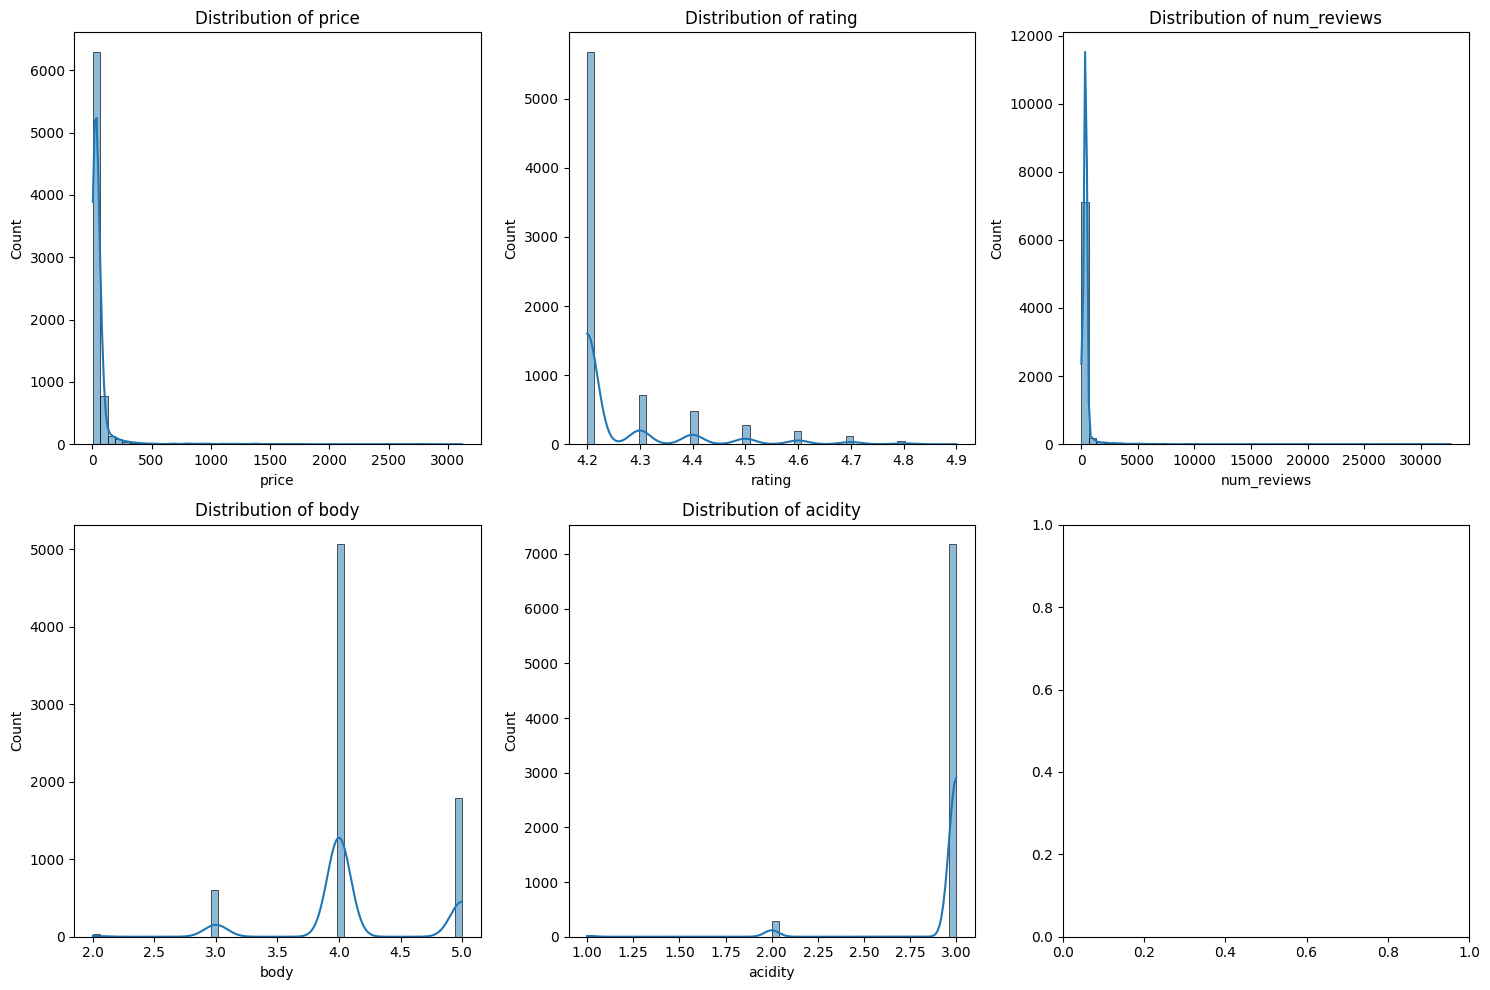

In [33]:
#histograms(gpt)

fig, axes = plt.subplots(2, 3, figsize=(15, 10))
axes = axes.flatten()

for i, col in enumerate(numerical_features):
    sns.histplot(df[col], bins=50, kde=True, ax=axes[i])
    axes[i].set_title(f"Distribution of {col}")

plt.tight_layout()
plt.show()

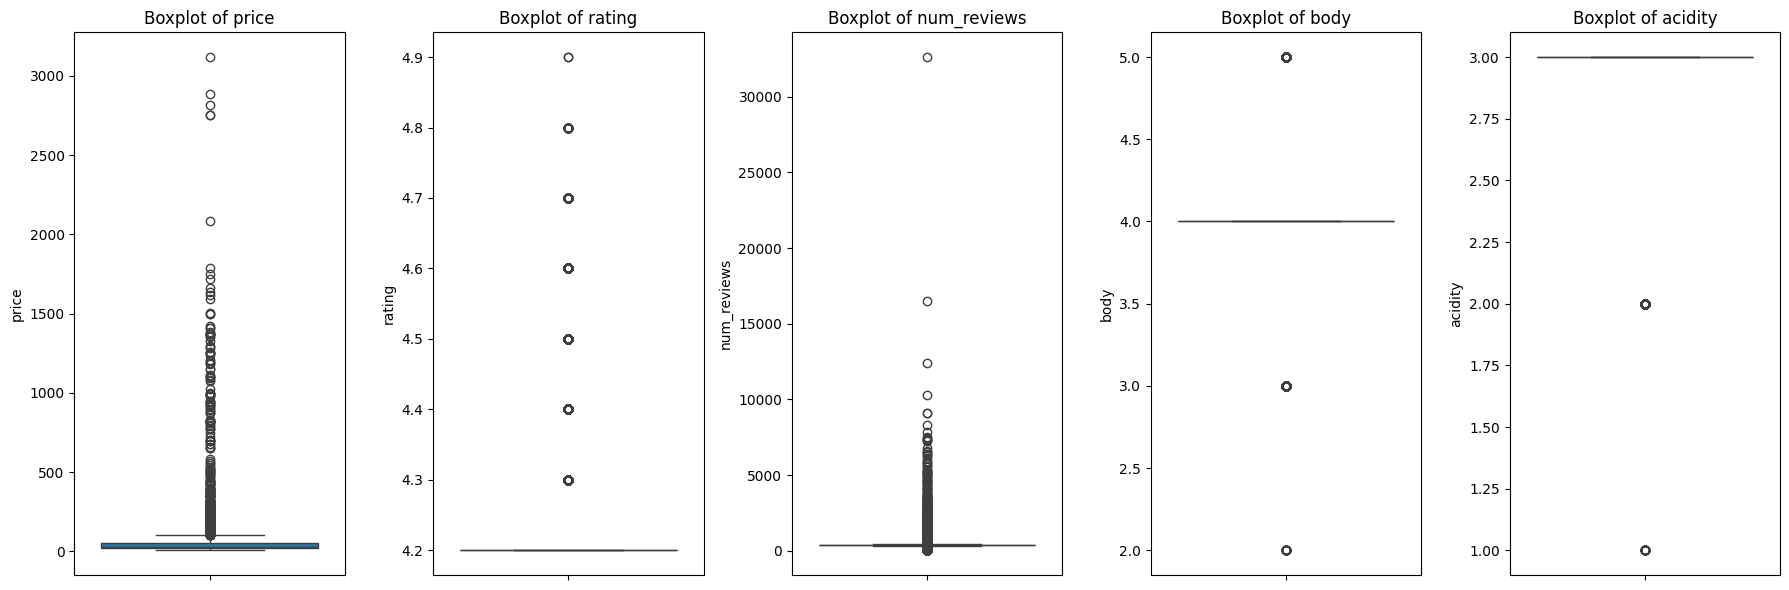

In [34]:
# boxplots (gpt)
fig, axes = plt.subplots(1, 5, figsize=(18, 6))
for i, col in enumerate(numerical_features):
    sns.boxplot(y=df[col], ax=axes[i])
    axes[i].set_title(f"Boxplot of {col}")

plt.tight_layout()
plt.show()

In [35]:
#check for skewness in the numerical features:

skew_values = df[numerical_features].skew()

print(skew_values)

# Negative Result --> Left-Skewed
# Positive Result --> Right-Skewed
# Close to zero --> Normal

price           9.643682
rating          2.443475
num_reviews    17.856062
body           -0.150524
acidity        -5.255944
dtype: float64


So,
◾ Price -> Right Skewed
◾ num_reviews -> Right Skewed
◾ Body -> Normal
◾ Acidity -> Left Skewed

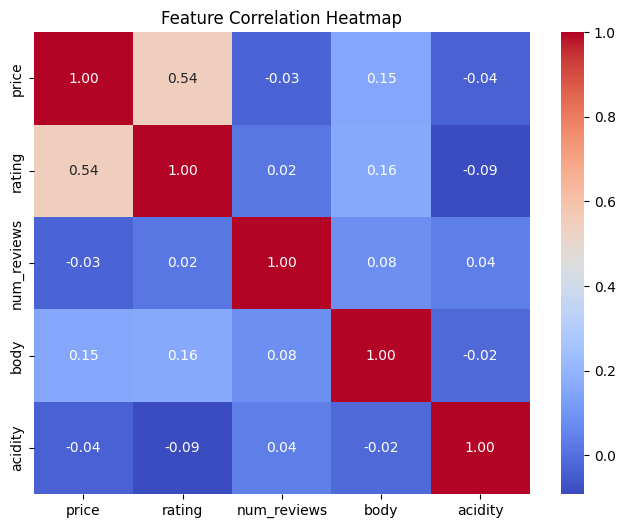

In [36]:
#num_reviews are highly skewed but higher rating may correspond to higher prices or a popular public taste in wine which might result in that wine being either premium or affordable or maybe even both so before skewing it we will try to find out the relation between reviews and price, rating using a correlation heatmap
correlation_matrix = df[['price', 'rating', 'num_reviews', 'body', 'acidity']].corr()

# Plot heatmap
plt.figure(figsize=(8,6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Feature Correlation Heatmap")
plt.show()

New Skewness Values:
 price_log          1.384255
num_reviews_log   -0.900599
acidity_squared   -4.766608
dtype: float64


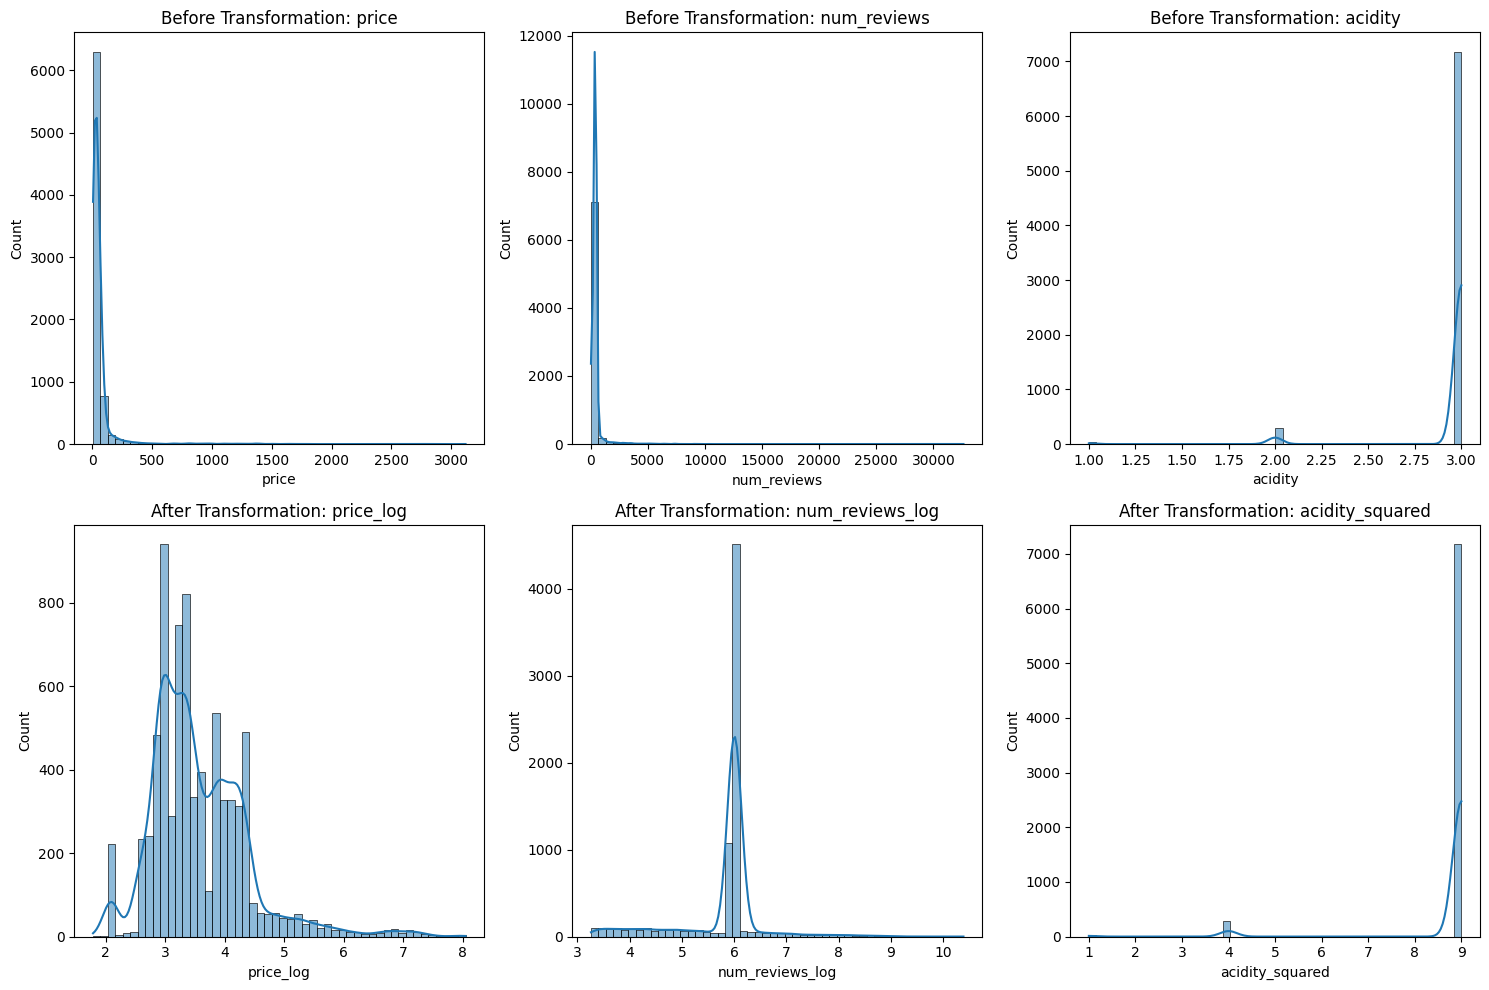

In [37]:
#Since the correlation is pretty low we will normalize it and remove the outliers

# Define skewed numerical features
skewed_features = ['price', 'num_reviews', 'acidity']

# Apply transformations
df['price_log'] = np.log1p(df['price'])  # Log transformation for right-skewed
df['num_reviews_log'] = np.log1p(df['num_reviews'])  # Log transformation for right-skewed
df['acidity_squared'] = df['acidity'] ** 2  # Square transformation for left-skewed

# Check new skewness values
new_skew_values = df[['price_log', 'num_reviews_log', 'acidity_squared']].skew()
print("New Skewness Values:\n", new_skew_values)

# Plot histograms before & after transformation
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
axes = axes.flatten()

features = ['price', 'num_reviews', 'acidity']
transformed_features = ['price_log', 'num_reviews_log', 'acidity_squared']

# Before transformation
for i, col in enumerate(features):
    sns.histplot(df[col], bins=50, kde=True, ax=axes[i])
    axes[i].set_title(f"Before Transformation: {col}")

# After transformation
for i, col in enumerate(transformed_features):
    sns.histplot(df[col], bins=50, kde=True, ax=axes[i+3])
    axes[i+3].set_title(f"After Transformation: {col}")

plt.tight_layout()
plt.show()

In [38]:
numerical_features = ['price_log', 'num_reviews_log', 'acidity_squared', 'rating', 'body']

skew_values = df[numerical_features].skew()

print(skew_values)

price_log          1.384255
num_reviews_log   -0.900599
acidity_squared   -4.766608
rating             2.443475
body              -0.150524
dtype: float64


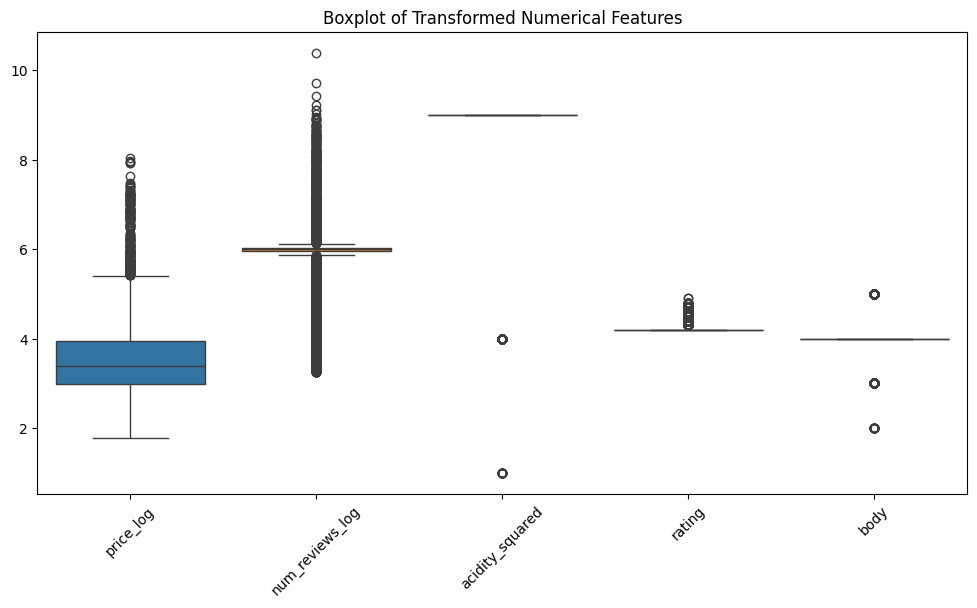

In [39]:
#Now that values are more normalized, checking for outliers again

plt.figure(figsize=(12, 6))
sns.boxplot(data=df[numerical_features])
plt.xticks(rotation=45)
plt.title("Boxplot of Transformed Numerical Features")
plt.show()

Since cutting outliers is getting rid of a lot of data...

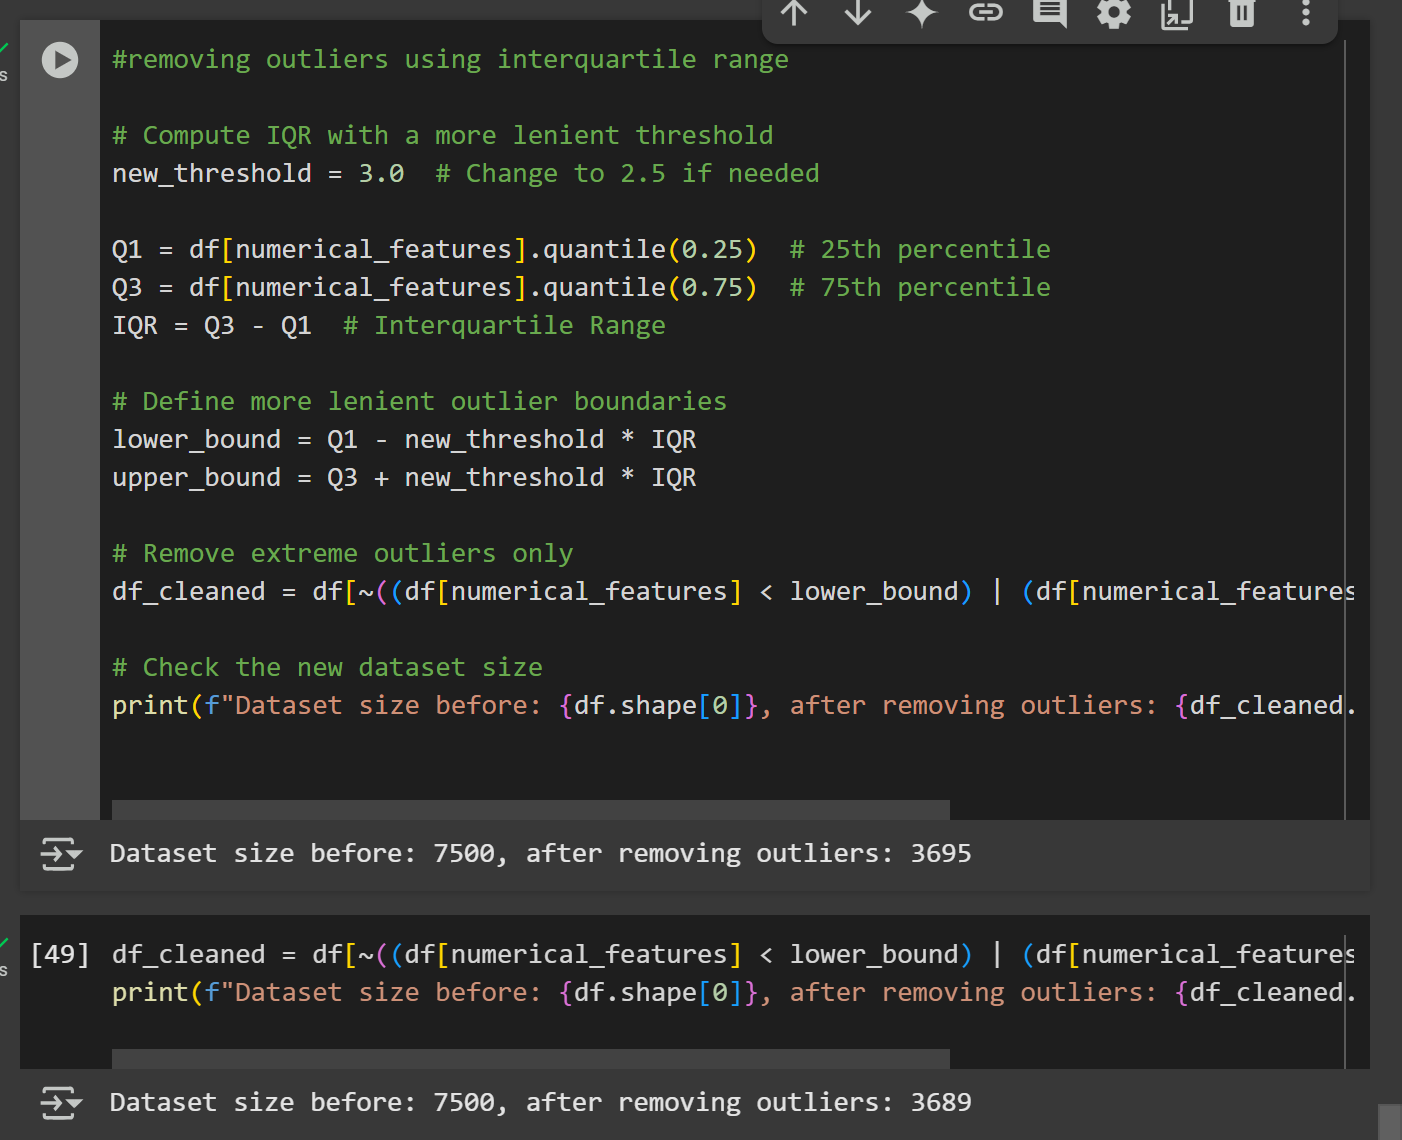


We will proceed with a process called capping (winsorization)
 basically cap the extreme values so there is not a lot of data loss.

In [40]:
# (gpt)
from scipy.stats.mstats import winsorize

df_winsorized = df.copy()

# Apply winsorization to numerical features
for col in numerical_features:
    df_winsorized[col] = winsorize(df[col], limits=(0.24, 0.24))

print(f"Dataset size before: {df.shape[0]}, after winsorization: {df_winsorized.shape[0]}")


Dataset size before: 7500, after winsorization: 7500


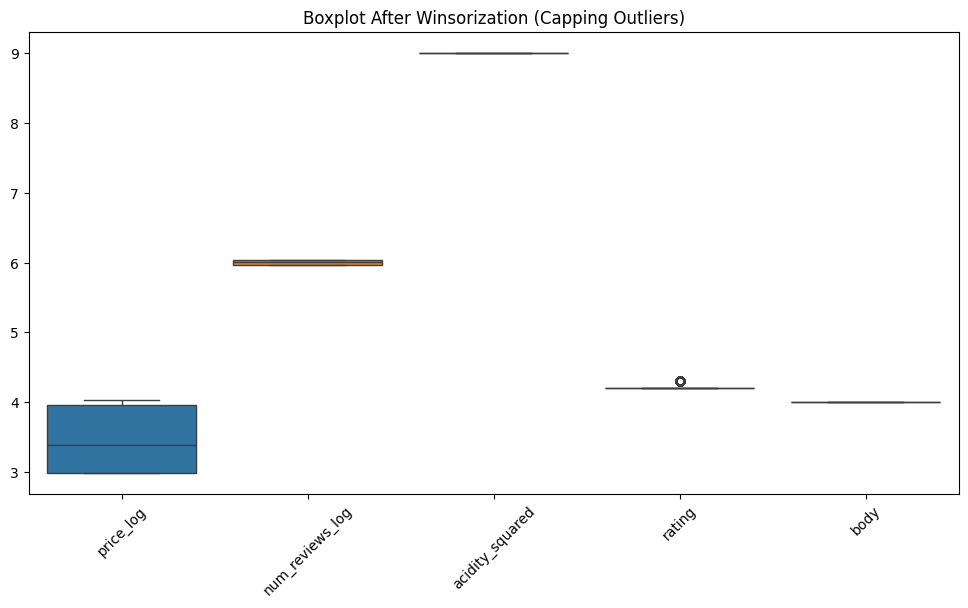

In [41]:
# a boxplot to check the effect
plt.figure(figsize=(12, 6))
sns.boxplot(data=df_winsorized[numerical_features])
plt.xticks(rotation=45)
plt.title("Boxplot After Winsorization (Capping Outliers)")
plt.show()

In [42]:
#Now that we have done capping and reduced the number of outliers we can now remove the remaining outliers

Q1 = df_winsorized[numerical_features].quantile(0.25)
Q3 = df_winsorized[numerical_features].quantile(0.75)
IQR = Q3 - Q1

# Defining the new outlier bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Removing remaining outliers
final_df = df_winsorized[~((df_winsorized[numerical_features] < lower_bound) |
                            (df_winsorized[numerical_features] > upper_bound)).any(axis=1)]

# Check new dataset size
print(f"Dataset size before: {df.shape[0]}, after winsorization: {df_winsorized.shape[0]}, after final outlier removal: {final_df.shape[0]}")

Dataset size before: 7500, after winsorization: 7500, after final outlier removal: 5679


So what I did above was try to winsorize as many outliers as possible (in other words I tried to cap the extreme values at a threshold instead of directly removing it)

I tried different percentages of the data i was capping in the highest and lowest ranges and I landed on 24%, which means that I capped 24% of the lowest and highest values in each feature (Lower values got pushed up, Larger ones got pushed down).

After that I used the IQR (Interquartile Range) method to get rid of the outliers, the extreme cases that weren't managed by the winzorization process.


In [43]:
final_df.to_csv('updated_wine_data.csv', index=False)

Visualizing the data with the target variable

In [44]:
df = pd.read_csv('updated_wine_data.csv')

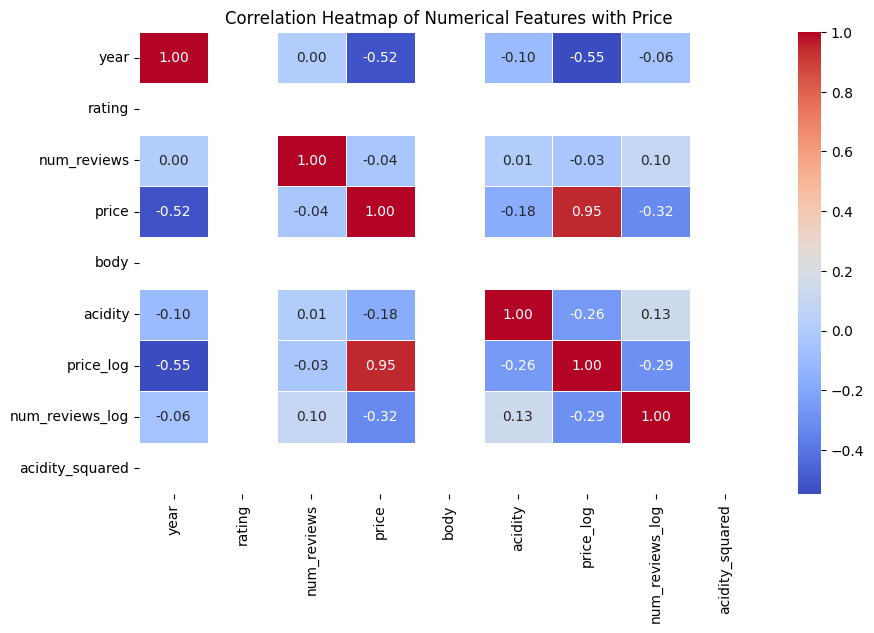

In [45]:
numeric_df = df.select_dtypes(include=["number"])

plt.figure(figsize=(10,6))
sns.heatmap(numeric_df.corr(), annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap of Numerical Features with Price")
plt.show()

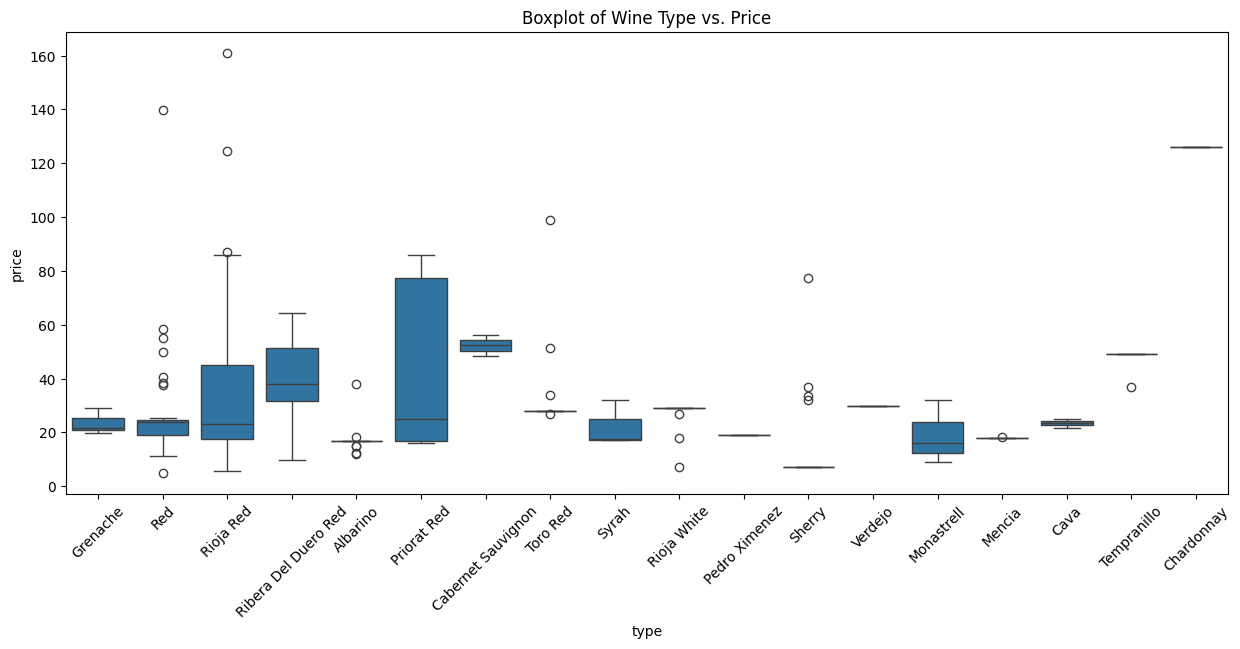

In [46]:
#to handle the categorical values separately
plt.figure(figsize=(15,6))
sns.boxplot(x="type", y="price", data=df)
plt.xticks(rotation=45)
plt.title("Boxplot of Wine Type vs. Price")
plt.show()


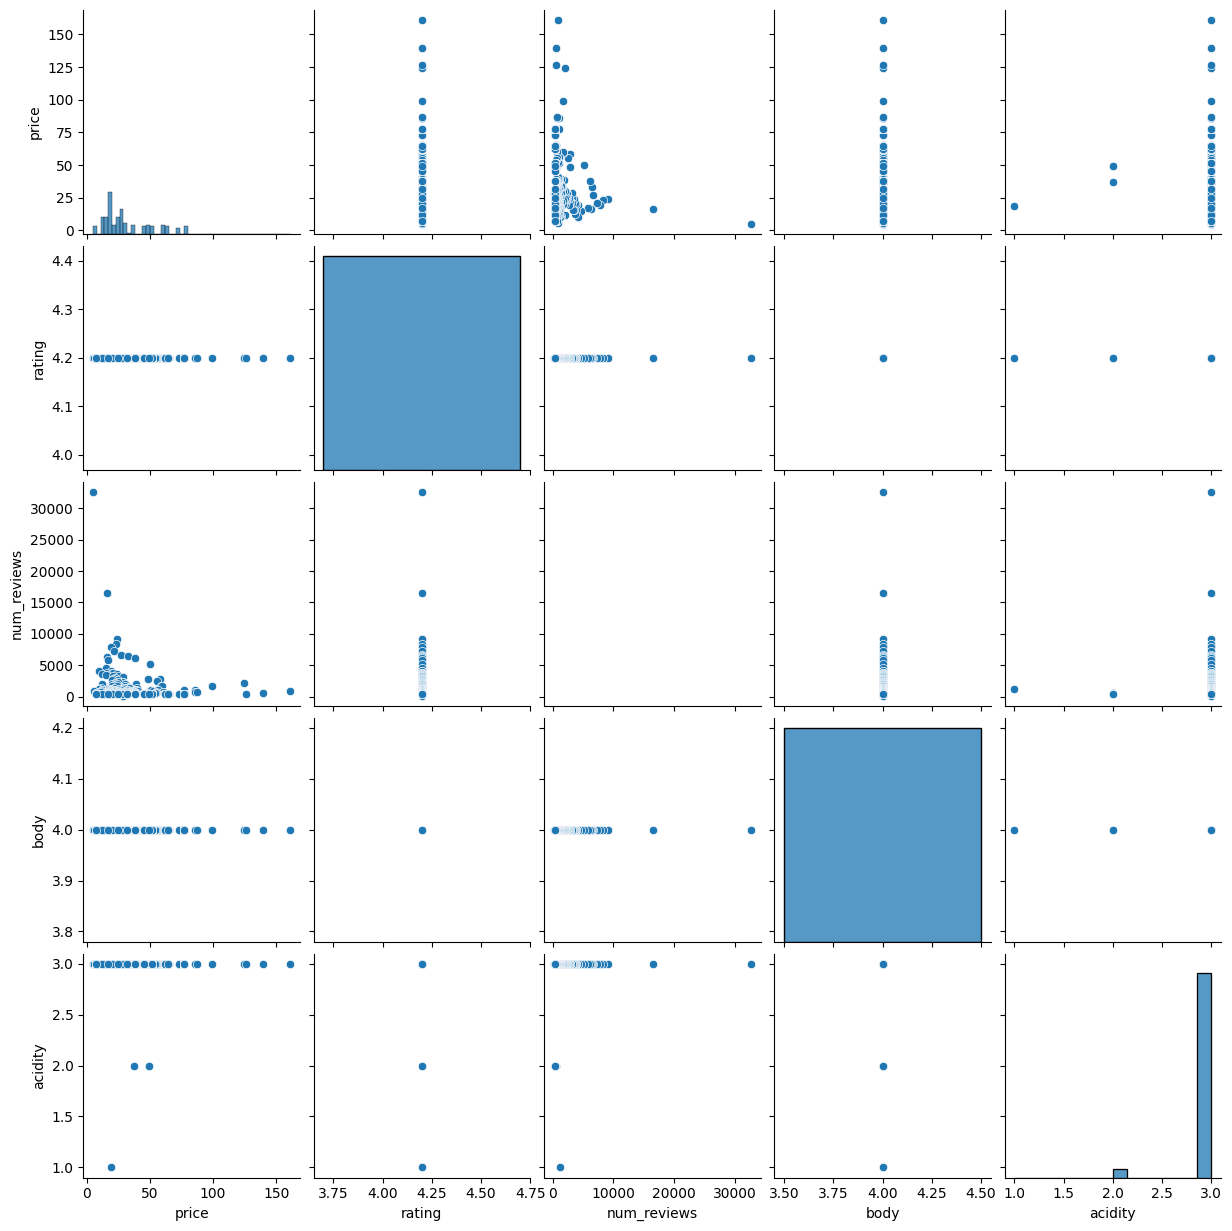

In [47]:
#pairplots

selected_features = ["price", "rating", "num_reviews", "body", "acidity"]

sns.pairplot(df[selected_features])
plt.show()

In [48]:
df.head()

,winery,wine,year,rating,num_reviews,country,region,price,type,body,acidity,price_log,num_reviews_log,acidity_squared
0,Palmeri Sicilia,Palmeri Navalta Garnacha,2016.0,4.2,151,Espana,Campo de Borja,28.90,Grenache,4.0,3.0,3.397858,5.966147,9.0
1,Felix Solis,Mucho Mas Tinto,2015.0,4.2,32624,Espana,Vino de Espana,4.99,Red,4.0,3.0,2.990720,6.030685,9.0
2,Marques de Riscal,Rioja Reserva,2016.0,4.2,16505,Espana,Rioja,15.90,Rioja Red,4.0,3.0,2.990720,6.030685,9.0
3,La Rioja Alta,Vina Ardanza Reserva,2007.0,4.2,9098,Espana,Rioja,23.70,Rioja Red,4.0,3.0,3.206803,6.030685,9.0
4,Marques de Murrieta,Reserva Rioja (Finca Ygay),2016.0,4.2,8318,Espana,Rioja,23.00,Rioja Red,4.0,3.0,3.178054,6.030685,9.0


In [50]:
df = df.drop(columns=["winery", "wine", "country", "region", "type", "acidity"]);

In [51]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

X = df.drop(columns=["price"])
y = df["price"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

from sklearn.metrics import mean_absolute_percentage_error

# Compute MAPE
mape = mean_absolute_percentage_error(y_test, y_pred) * 100  # Convert to percentage

# Compute Accuracy
accuracy = 100 - mape

print(f"Prediction Accuracy: {accuracy:.2f}%")

Prediction Accuracy: 84.06%
